# Projeto: Análise de Dados de Música em Plataformas

Link do dataset: https://www.kaggle.com/datasets/zeesolver/spotfy

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
# ajuste geral do notebook
plt.style.use('ggplot')
sns.set_palette('Set1')

## 1) Entendimento do Problema e Definição de Objetivos

Objetivo do Projeto: Realizar uma análise exploratória do dataset e tirar possíveis insights relacionado às músicas em diferentes plataformas.

## 2) Carregamento e Visualização geral do Dataset

Ao importar o arquivo CSV, o pandas já formatou a tabela corretamente. Interessante  
O pandas deu um erro ao importar o dataset, então usei o argumento `encoding='latin-1'` e deu certo

In [4]:
# removendo limite para output truncado
pd.set_option('display.max_columns', 30)

# importando tabela principal, sem modificações
raw_df = pd.read_csv("D:/Desktop/PlenilunoS/Dev Hub/1. Data HUB/Projetos/5. Analise do Spotify/Popular_Spotify_Songs.csv", encoding='latin-1')
display(raw_df.head())
display(raw_df.tail())

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,18,32,1,0,90,E,Minor,61,32,67,15,0,11,5


In [5]:
# visão geral da tabela e dos seus tipos de dados
categoric_columns = len(raw_df.select_dtypes(include='object').columns.to_list())
numeric_columns = len(raw_df.select_dtypes(include='int').columns.to_list())
print(f'Quantidade de colunas categóricas: {categoric_columns}')
print(f'Quantidade de colunas numéricas: {numeric_columns}\n')

print(raw_df.info())

Quantidade de colunas categóricas: 7
Quantidade de colunas numéricas: 17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm             

## 3) Limpeza e Tratamento dos Dados

Primeiro comecei verificando se tinha linhas duplicadas e se havia valores nulos no dataset.  
Ambos os casos foram verdadeiros, então removi as linhas duplicadas e em seguida os valores nulos. 

In [6]:
# removendo linhas duplicadas 
df = raw_df.drop_duplicates()

# verificando se há valores nulos no dataset 
count_nulls = df.isnull().sum()
display(count_nulls)
display(df.info())

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

None

A partir daqui, comecei a corrigir algumas colunas que, apesar de estarem como números, se tratam de strings na verdade:  
- streams [OK]  
- in_deezer_playlists [OK]   
- in_shazam_charts [OK]  

In [7]:
# Exibindo somente as colunas do tipo object
for column in df.columns:
    if pd.api.types.is_object_dtype(df[column]):
        print(column)


track_name
artist(s)_name
streams
in_deezer_playlists
in_shazam_charts
key
mode


Talvez só precisamos identificar as colunas exatas que queremos converter para numérico  
- identificar as colunas que está do tipo object
- selecionar elas 
- formatar de object para int
- converter object para string primeiro?

In [8]:
# função para descobrir o índice de uma coluna
def locate_index(column_name):
    column_index = df.columns.get_loc(column_name)
    return column_index

# função para converter para numérico os dados numéricos que são do tipo OBJECT de uma coluna
# caso os dados convertidos já fiquem em formato int64 não precisa usar a próxima função
def convert_num_obj_columns(column_name):
    converted_num_column = pd.to_numeric(df[column_name], errors='coerce')
    return converted_num_column

# função para converter os dados float64 para int64
def convert_float_columns_to_int(column_name):
    converted_int_column = df[column_name].fillna(0, inplace=True)
    converted_int_column = pd.to_numeric(df[column_name].round().astype('int64'))
    return converted_int_column

# convertendo coluna streams de obj para int64
df['streams'] = convert_num_obj_columns('streams')
df['streams'] = convert_float_columns_to_int('streams')

# convertendo coluna in_deezer_playlists de obj para int64 
df['in_deezer_playlists'] = convert_num_obj_columns('in_deezer_playlists')
df['in_deezer_playlists'] = convert_float_columns_to_int('in_deezer_playlists')

# convertendo coluna in_shazam_charts de obj para int64 
df['in_shazam_charts'] = convert_num_obj_columns('in_shazam_charts')
df['in_shazam_charts'] = convert_float_columns_to_int('in_shazam_charts')

# convertendo o tipo de dado de múltiplas colunas AO MESMO TEMPO
# alternativa ao uso das funções acima
# df = df.astype({'streams': 'int64', 'in_deezer_playlists':'int64', 'in_shazam_charts': 'int64'})
display(df.dtypes)


track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [9]:
# verificando quantidade atualizada de valores nulos 
count_nulls = df.isnull().sum()
display(count_nulls)


track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Aqui entramos em um impasse, pois a coluna Keys possui 95 valores nulos. No entanto, eu não posso remover as linhas associadas a esses nulos, pois ela contém valores importantes... O que podemos fazer é: 
- prosseguir com a análise mas não levar a coluna keys em consideração ao analisar o dataset OU
- remover as linhas associadas aos nulos de key e prosseguir com a análise
  - mas para fazer isso, temos que avaliar se a perda de dados será significativa. E é por isso que fiz o código abaixo, que avalia isso

In [10]:
# Identificar a importância das colunas
print("\nAnálise de impacto:")
print(df.describe(include='all'))

# Analisar quantas linhas seriam removidas ao eliminar valores nulos
rows_before = df.shape[0]
rows_after = df.dropna().shape[0]
print(f'\nLinhas antes de remover nulos: {rows_before}')
print(f'\nLinhas depois de remover nulos: {rows_after}')

# Decisão de remover ou preencher valores nulos
if rows_after / rows_before > 0.9:
    print("Remover linhas com valores nulos, pois a perda de dados é baixa.") 
    df_cleaned = df.dropna()
else:
    print("Preencher valores nulos, pois a perda de dados é significativa.")
    df['key'] = df['key'].fillna(df['key'].mode()[0])
display(df.head())



Análise de impacto:
       track_name artist(s)_name  artist_count  released_year  released_month  \
count         953            953    953.000000     953.000000      953.000000   
unique        943            645           NaN            NaN             NaN   
top      Daylight   Taylor Swift           NaN            NaN             NaN   
freq            2             34           NaN            NaN             NaN   
mean          NaN            NaN      1.556139    2018.238195        6.033578   
std           NaN            NaN      0.893044      11.116218        3.566435   
min           NaN            NaN      1.000000    1930.000000        1.000000   
25%           NaN            NaN      1.000000    2020.000000        3.000000   
50%           NaN            NaN      1.000000    2022.000000        6.000000   
75%           NaN            NaN      2.000000    2022.000000        9.000000   
max           NaN            NaN      8.000000    2023.000000       12.000000   

      

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


Criei duas instâncias do data frame caso queiramos voltar atrás na análise:  
1 - Dataframe que MANTÉM a coluna Key, mas remove as linhas associadas aos 95 valores nulos (`df_without_null_lines`)    
2 - Dataframe com a coluna Key removida (`df_without_key_column`)

Além disso, também temos o dataframe original, que possui os valores nulos (`df`)

In [11]:
df_without_null_lines = df.dropna()
df_without_key_column = df.drop(columns=['key'])

## 4) Análises iniciais 

### 4.1) Perguntas

- qual a música que mais foi stremada?
- qual a música mais popular do spotify?
- qual a música mais popular do apple music?
- saber top 10 músicas mais stremadas?
- plotar um gráfico com as características musicais das tracks do top 10 
- as músicas mais stremadas fazem partes dessas músicas lançadas nos meses mais ativos?
- Não necessariamente o mês que teve mais lançamentos vai ser o mês ideal para se lançar uma música
- Avaliar se as musicas mais stremadas foram lançada nesse mês específico

### 4.2) Análises simples

In [12]:
# Achando a música com maior número de streaming 
max_stream_index = df_without_key_column['streams'].idxmax()
most_streamed_song = df_without_key_column.loc[max_stream_index]
track_name = df_without_key_column['track_name'][max_stream_index]
artist_name = df_without_key_column['artist(s)_name'][max_stream_index]
spotify_playlists_count = df_without_key_column['in_spotify_playlists'].loc[max_stream_index]

print(f'Nome: {track_name}')
print(f'Artista: {artist_name}')
print(f'Presente em quantas playlist (Spotify)? -> {spotify_playlists_count}')


Nome: Blinding Lights
Artista: The Weeknd
Presente em quantas playlist (Spotify)? -> 43899


In [13]:
# Música mais amada do spotify?
max_playlist_index_spotify = df_without_key_column['in_spotify_playlists'].idxmax()
most_added_song_spotify = df_without_key_column.loc[max_playlist_index_spotify]
track_name = df_without_key_column['track_name'][max_playlist_index_spotify]
artist_name = df_without_key_column['artist(s)_name'][max_playlist_index_spotify]
spotify_playlists_count = df_without_key_column['in_spotify_playlists'][max_playlist_index_spotify]

print(f'Nome: {track_name}')
print(f'Artista: {artist_name}')
print(f'Presente em quantas playlist (Spotify)? -> {spotify_playlists_count}')

Nome: Get Lucky - Radio Edit
Artista: Pharrell Williams, Nile Rodgers, Daft Punk
Presente em quantas playlist (Spotify)? -> 52898


In [14]:
# Música mais amada do apple music?
max_playlist_index_apple = df_without_key_column['in_apple_playlists'].idxmax()
most_added_song_apple = df_without_key_column.loc[max_playlist_index_apple]
track_name = df_without_key_column['track_name'][max_playlist_index_apple]
artist_name = df_without_key_column['artist(s)_name'][max_playlist_index_apple]
apple_playlists_count = df_without_key_column['in_apple_playlists'][max_playlist_index_apple]

print(f'Nome: {track_name}')
print(f'Artista: {artist_name}')
print(f'Presente em quantas playlists (Apple Music)? -> {apple_playlists_count}')

Nome: Blinding Lights
Artista: The Weeknd
Presente em quantas playlists (Apple Music)? -> 672


In [15]:
# sabendo qual música de menor classificação na coluna `charts`
max_idx = df_without_key_column['in_spotify_charts'].idxmax()
print(f"Música em último lugar no ranking do spotify: {df_without_key_column['track_name'][max_idx]}")
print(f"Última classificação no ranking do spotify: {df_without_key_column['in_spotify_charts'][max_idx]}")

Música em último lugar no ranking do spotify: Seven (feat. Latto) (Explicit Ver.)
Última classificação no ranking do spotify: 147


## 5) Gráficos

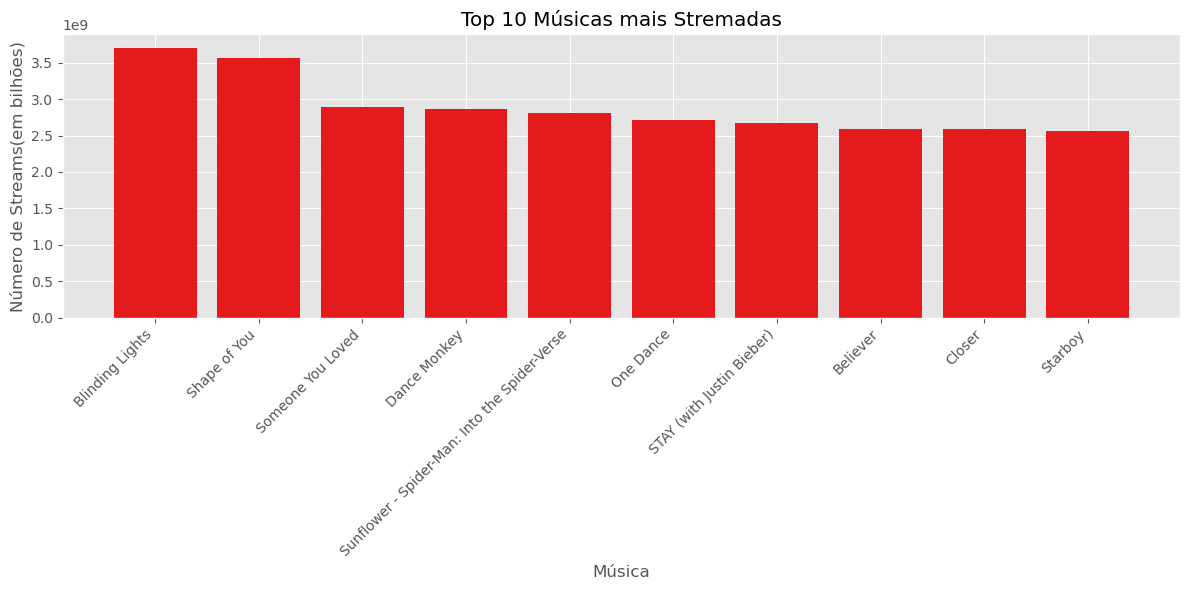

In [16]:
# top 10 músicas mais stremadas
top_10_songs = df_without_key_column.sort_values(by='streams', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10_songs['track_name'], top_10_songs['streams'])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Músicas mais Stremadas')
plt.xlabel('Música')
plt.ylabel('Número de Streams(em bilhões)')
plt.tight_layout()
plt.show()



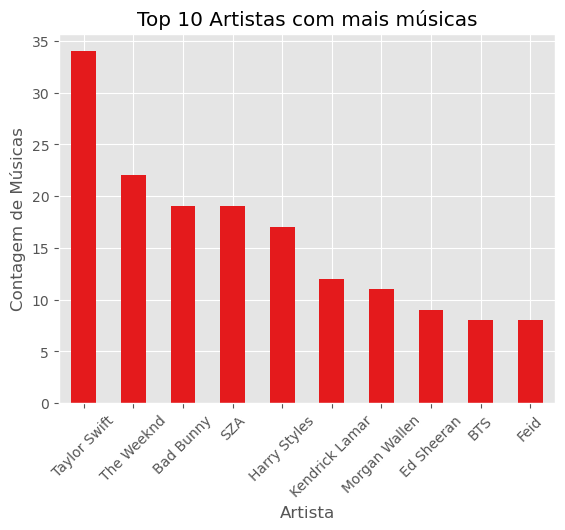

In [62]:
# Top 10 artistas possuem mais músicas no dataset?

df_without_key_column['artist(s)_name'].value_counts().head(10).plot(kind='bar')
plt.xticks(rotation=45)
plt.title('Top 10 Artistas com mais músicas')
plt.xlabel('Artista')
plt.ylabel('Contagem de Músicas')
plt.show()

### 4.3) Histogramas

O ano de músicas mais lançadas: 2022, Quantidade: 402


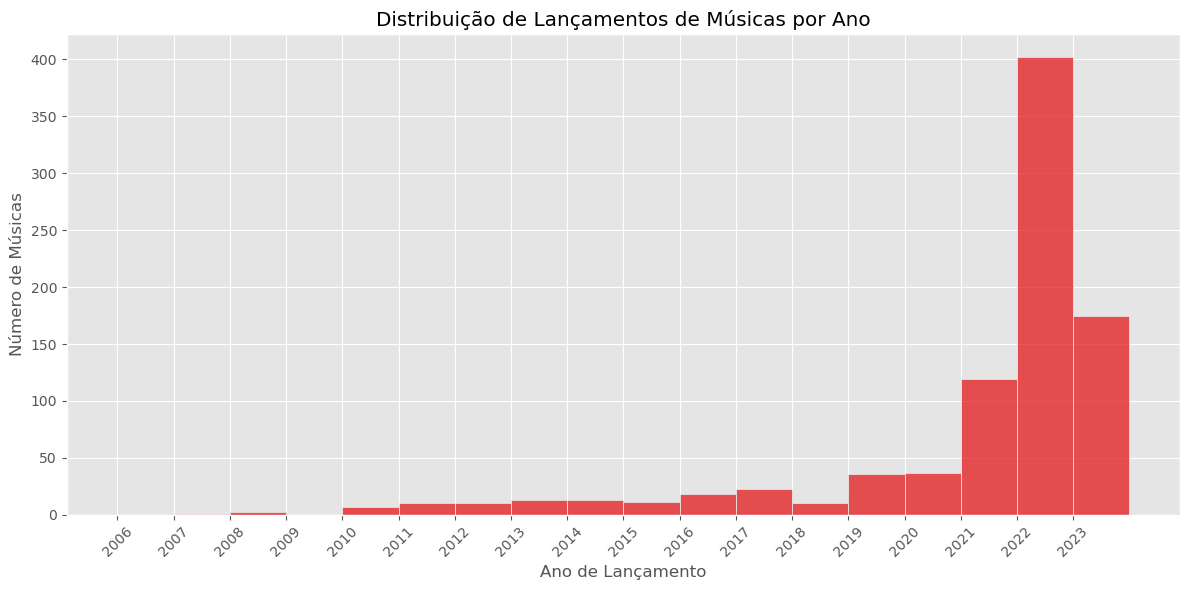

In [61]:
# Qual ano foi responsável por ter mais músicas lançadas?

# cria uma série com anos e quantas vezes o ano aparece no dataset
year_counts = df_without_key_column['released_year'].value_counts()
# faz uma filtragem do ano que mais apareceu no dataset
most_released_year = year_counts.idxmax()
print(f'O ano de músicas mais lançadas: {most_released_year}, Quantidade: {year_counts[most_released_year]}') 

plt.figure(figsize=(12, 6))
sns.histplot(df_without_key_column['released_year'], bins=range(2006, 2024 + 1), kde=False)
plt.xticks(range(2006, 2024), rotation=45)
plt.xlabel('Ano de Lançamento')
plt.ylabel('Número de Músicas')
plt.title('Distribuição de Lançamentos de Músicas por Ano')
plt.tight_layout()
plt.show()

De acordo com esse gráfico, desde o ano de lançamento do Spotify (2006), o ano que mais apresentou lançamentos de novas músicas foi 2022, com um número de 402 músicas. Isso pode se dar porque nesse mesmo ano ocorreu a Copa do Mundo? 

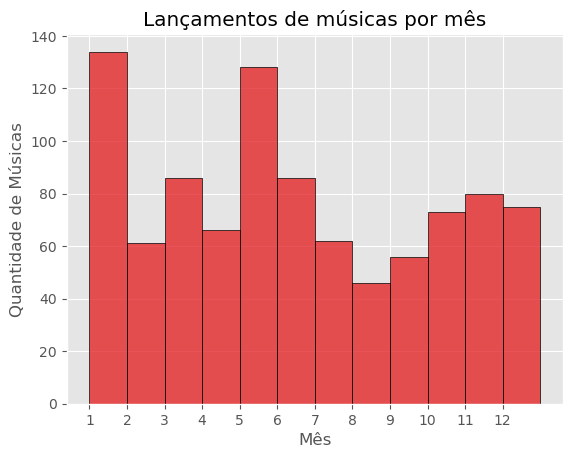

In [19]:
# Saber qual mês teve mais lançamentos
sns.histplot(df_without_key_column['released_month'], bins=range(1, 14), edgecolor='black')
plt.xticks(range(1, 13))
plt.title('Lançamentos de músicas por mês')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Músicas')
plt.show()

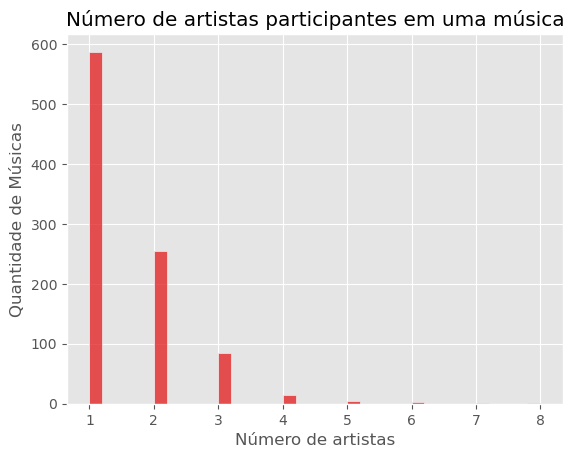

In [20]:
# Saber se tem mais músicas de artistas solo ou composto
sns.histplot(df_without_key_column['artist_count'])
plt.title('Número de artistas participantes em uma música')
plt.xlabel('Número de artistas')
plt.ylabel('Quantidade de Músicas')
plt.show()

### 4.4) Scatter Plots

Eu não soube aplicar bem o scatter plot, mas pelo menos aprendi que dá pra fazer scatterplots com matplotlib e com seaborn  
O ideal do scatterplot seria achar uma correlação entre duas variáveis do dataset, mas ainda não consegui encontrar qual seria essa variável  

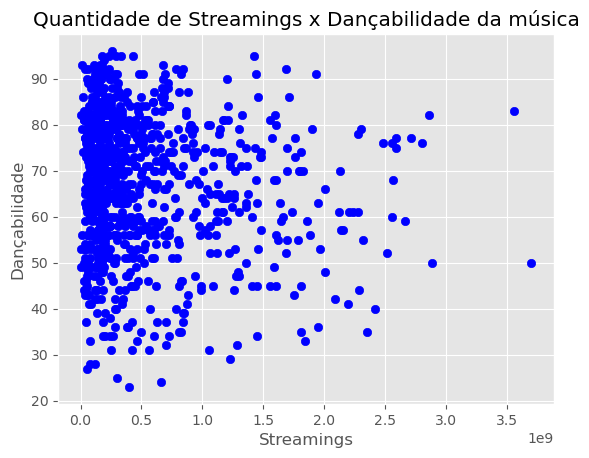

In [21]:
plt.scatter(df_without_key_column['streams'], df_without_key_column['danceability_%'], color='blue')
plt.title('Quantidade de Streamings x Dançabilidade da música')
plt.xlabel('Streamings')
plt.ylabel('Dançabilidade')
plt.show()

Vou tentar fazer um scatter plot pra relacionar as características das musicas com algumas variáveis 
- número de streamings x spotify playlists e apple playlists
- número de streamings x músicas do spotify charts e apple charts

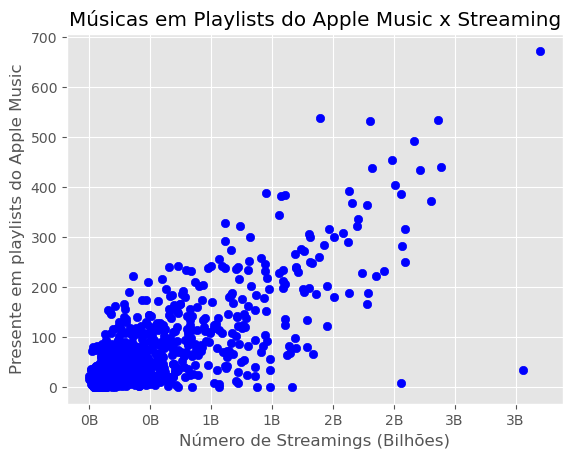

In [99]:
# número de streamings x apple music playlists

def billions(x, pos):
    return f'{int(x/1e9)}B'

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(billions))
plt.scatter(df_without_key_column['streams'], df_without_key_column['in_apple_playlists'], color='blue')
plt.title('Músicas em Playlists do Apple Music x Streaming')
plt.xlabel('Número de Streamings (Bilhões)')
plt.ylabel('Presente em playlists do Apple Music')
plt.show()

Scatter plot é recomendado caso queiramos comparar variáveis contínuas que tem uma tendência a aumentar ou diminuir.  
Nesse caso, eu comparei o número de streaming de uma música com a quantidade de playlists em que ela está presente. O scatterplot me diz que 
uma música que possui mais streamings tende a estar presente em mais playlists do spotify. A partir disso eu poderia tentar achar as características musicais mais relevantes, relacionadas ao número de streamings e playlists do apple music

Esse código visa distribuir melhor o eixo X para mostrar os valores abaixo de bilhões com relação ao APPLE MUSIC

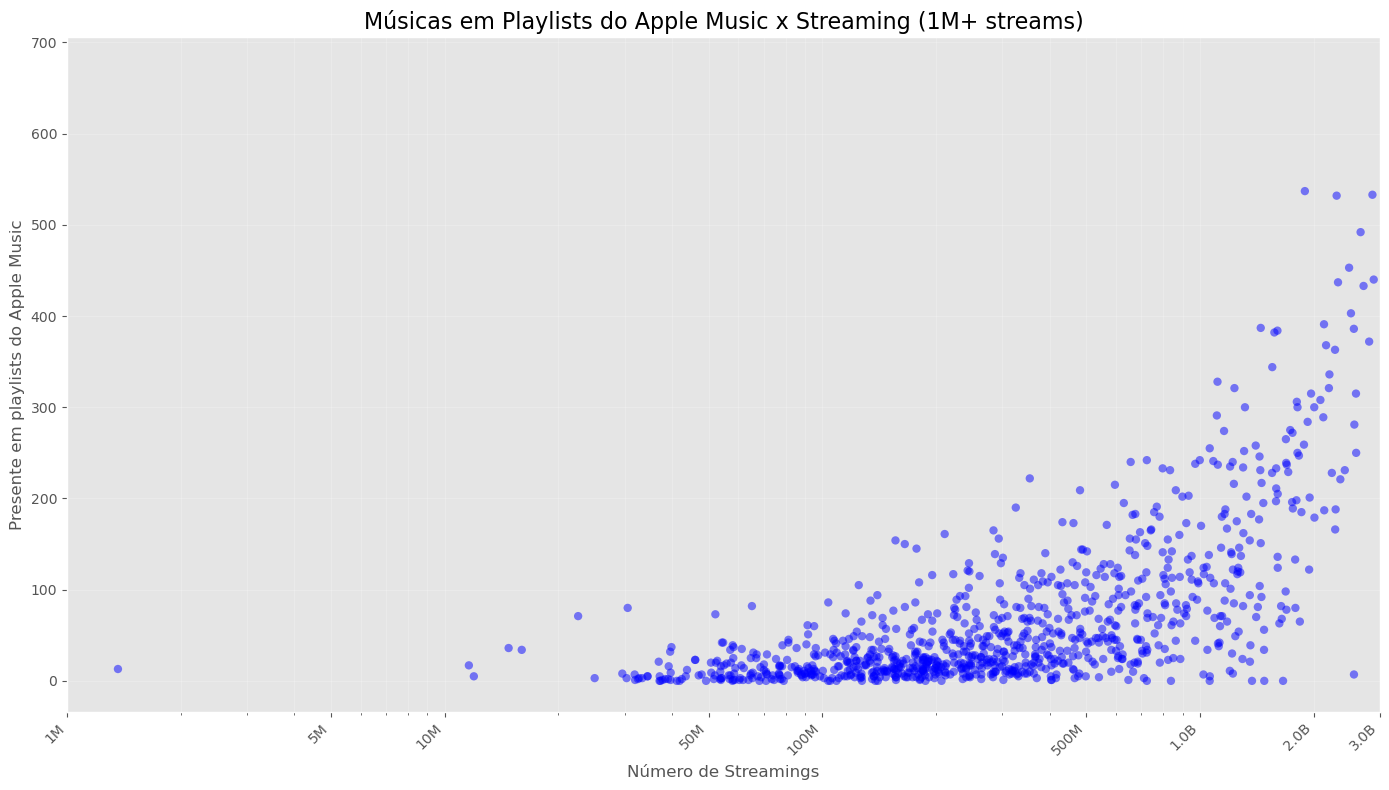

In [109]:
# Função para formatar os números em milhões e bilhões
def format_func(value, tick_number):
    if value < 1e9:
        return f'{value/1e6:.0f}M'
    else:
        return f'{value/1e9:.1f}B'

# Criando o gráfico
plt.figure(figsize=(14, 8))

# Definindo os ticks personalizados começando de 1 milhão
custom_ticks = [1e6, 5e6, 1e7, 5e7, 1e8, 5e8, 1e9, 2e9, 3e9]

# Filtrando o DataFrame para incluir apenas músicas com 1 milhão ou mais de streamings
df_filtered = df_without_key_column[df_without_key_column['streams'] >= 1e6]

# Plotando os dados
plt.scatter(df_filtered['streams'], df_filtered['in_apple_playlists'], 
            color='blue', alpha=0.5, edgecolors='none')

# Configurando o eixo x
plt.xscale('log')  # Escala logarítmica
plt.xlim(1e6, 3e9)  # Limitando o eixo x de 1 milhão a 3 bilhões
plt.xticks(custom_ticks)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Rotacionando e alinhando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos e título
plt.title('Músicas em Playlists do Apple Music x Streaming (1M+ streams)', fontsize=16)
plt.xlabel('Número de Streamings', fontsize=12)
plt.ylabel('Presente em playlists do Apple Music', fontsize=12)

# Adicionando grid para melhor visualização
plt.grid(True, which="both", ls="-", alpha=0.2)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

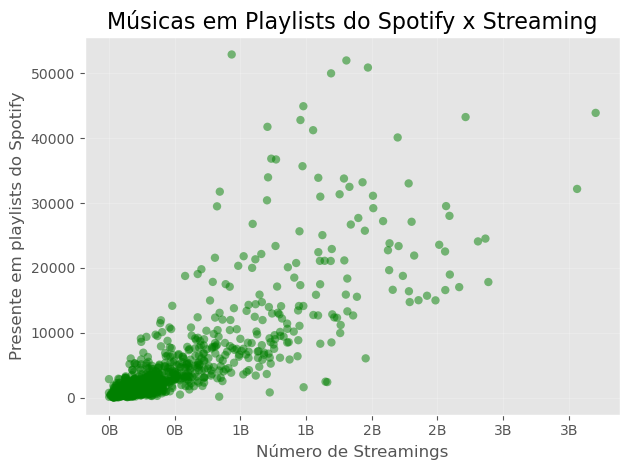

In [102]:
# número de streamings x spotify playlists

plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(billions))



plt.scatter(df_without_key_column['streams'], df_without_key_column['in_spotify_playlists'], color='green', alpha=0.5, edgecolors='none')

plt.title('Músicas em Playlists do Spotify x Streaming', fontsize=16)
plt.xlabel('Número de Streamings', fontsize=12)
plt.ylabel('Presente em playlists do Spotify', fontsize=12)

# Adicionando grid para melhor visualização
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
plt.show()

Aqui no spotify tem alguns outliers, pois a música que está presente em mais playlist não é a música mais stremada...
Mas talvez essa comparação com os scatter plots não faça muito sentido, pois os dados de streams que eu tenho são dados GERAIS, digo, não  
tem como saber se esses streamings são apenas do spotify, apenas do apple music ou de todos os streamings de musica. 

Vou tentar resolver esse problema da aglomeração de dados no scatter plot

Scatter plot pra começar a avaliar as características musicais com as músicas das playlists -> não parece ter correlação direta entre as características das músicas e outras caracteristicas como spotify playlists, apple charts e etc. Sempre é gerado gráficos assim:


Esse código visa distribuir melhor o eixo X para mostrar os valores abaixo de bilhões com relação ao SPOTIFY

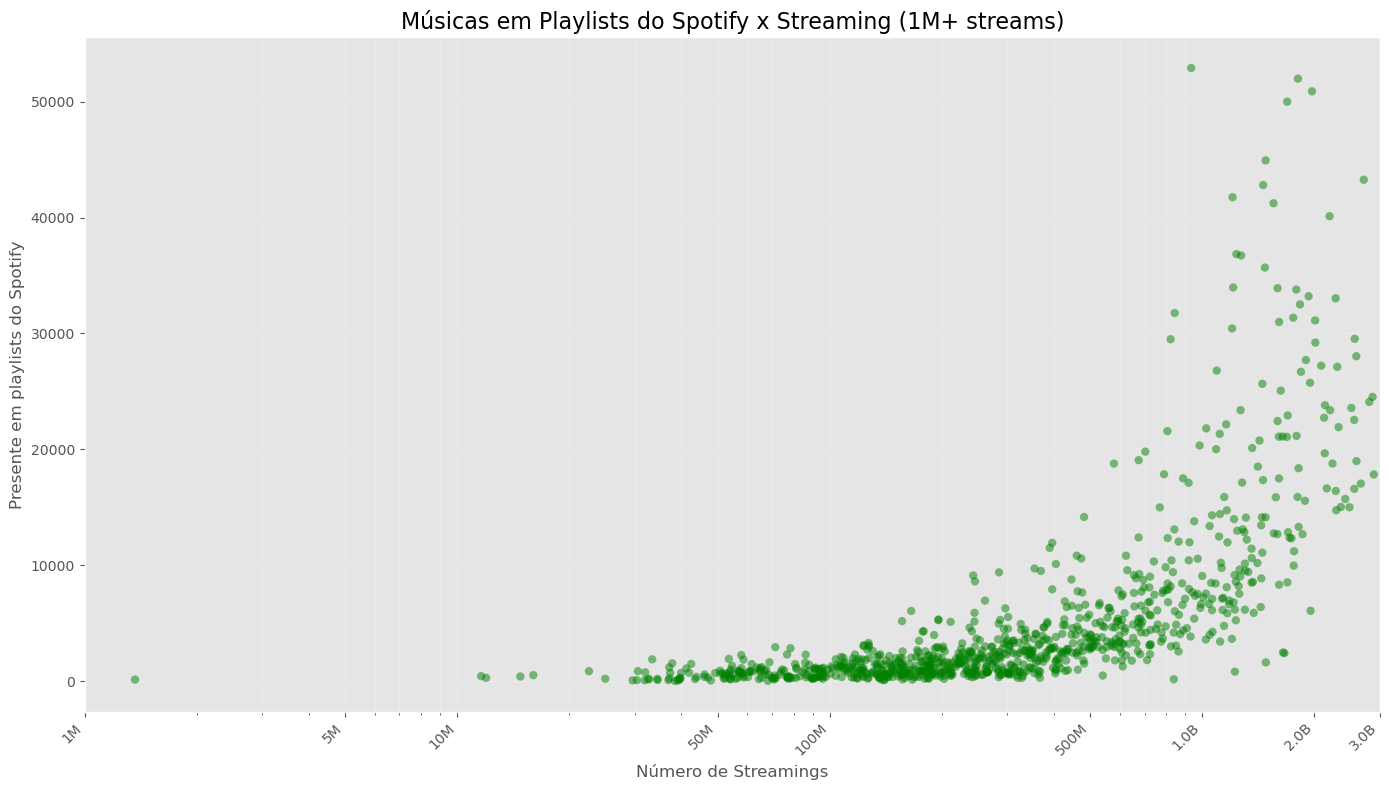

In [108]:
# Função para formatar os números em milhões e bilhões
def format_func(value, tick_number):
    if value < 1e9:
        return f'{value/1e6:.0f}M'
    else:
        return f'{value/1e9:.1f}B'

# Criando o gráfico
plt.figure(figsize=(14, 8))

# Definindo os ticks personalizados começando de 1 milhão
custom_ticks = [1e6, 5e6, 1e7, 5e7, 1e8, 5e8, 1e9, 2e9, 3e9]

# Filtrando o DataFrame para incluir apenas músicas com 1 milhão ou mais de streamings
df_filtered = df_without_key_column[df_without_key_column['streams'] >= 1e6]

# Plotando os dados
plt.scatter(df_filtered['streams'], df_filtered['in_spotify_playlists'], 
            color='green', alpha=0.5, edgecolors='none')

# Configurando o eixo x
plt.xscale('log')  # Escala logarítmica
plt.xlim(1e6, 3e9)  # Limitando o eixo x de 1 milhão a 3 bilhões
plt.xticks(custom_ticks)
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

# Rotacionando e alinhando os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos e título
plt.title('Músicas em Playlists do Spotify x Streaming (1M+ streams)', fontsize=16)
plt.xlabel('Número de Streamings', fontsize=12)
plt.ylabel('Presente em playlists do Spotify', fontsize=12)

# Adicionando grid para melhor visualização
plt.grid(True, which="both", ls="-", alpha=0.2)

# Ajustando o layout
plt.tight_layout()

# Exibindo o gráfico
plt.show()

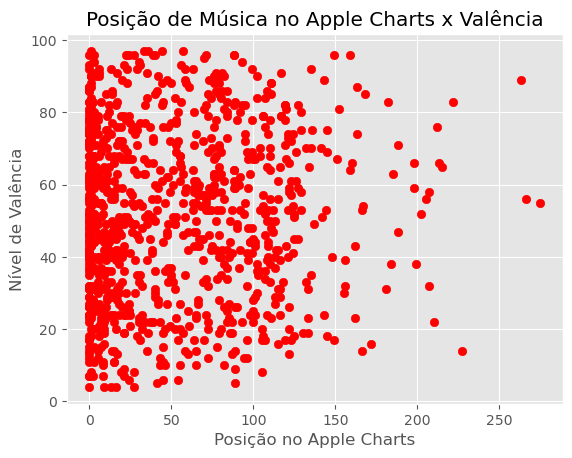

In [24]:
plt.scatter(df_without_key_column['in_apple_charts'], df_without_key_column['valence_%'], color='red')
plt.title('Posição de Música no Apple Charts x Valência')
plt.xlabel('Posição no Apple Charts')
plt.ylabel('Nível de Valência')
plt.show()

Agora quero usar um scatter plot pra avaliar a correlação entre o ano de 2022 e alguma característica musical, mas não deu muito certo. Pelo menos eu aprendi a como criar dataframe diltrados para fazer análises mais específicas

In [123]:
min_year = 2000
max_year = 2024
df_specific_years_range = df_without_key_column[(df_without_key_column['released_year'] >= min_year) & (df_without_key_column['released_year'] <= max_year)]

### 4.5) Line plot

Vou plotar alguns line plots para avaliar o desempenho das principais características musicais ao longo dos anos. Para isso eu filtrei o dataset com dados de músicas lançadas entre os anos 2000 e 2024.

#### BPM: o ritmo de uma música
Maior BPM: indica uma música com ritmo mais animado  
Menor BPM: indica uma música com ritmo mais lento

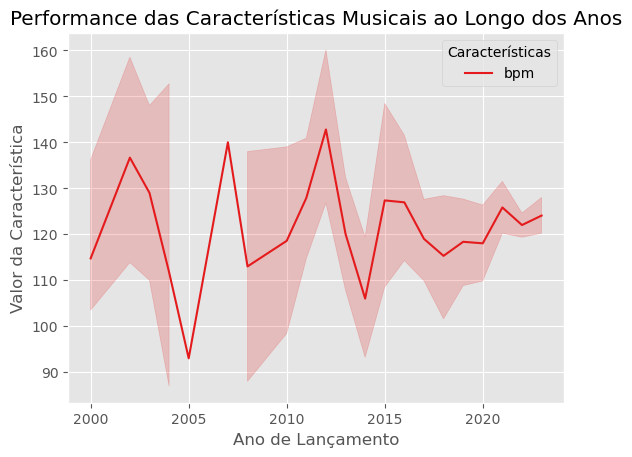

In [126]:
# Selecionando as características que você deseja plotar
characteristics = 'bpm'  

# Para cada característica, plotamos uma linha representando a variação por ano
sns.lineplot(x='released_year', y=characteristics, data=df_specific_years_range, label=characteristics)

# Ajustando os rótulos e o título
plt.xlabel('Ano de Lançamento')
plt.ylabel('Valor da Característica')
plt.title('Performance das Características Musicais ao Longo dos Anos')

# Exibindo a legenda para identificar cada linha
plt.legend(title='Características')

# Exibindo o gráfico
plt.show()


#### Valência: se trata do "humor" transmitido pela música.  
Maior valência = música tende a ser mais humorada, e transmite mais alegria
Menor valência = música tende a ser menos humorada, e transmite mais tristeza

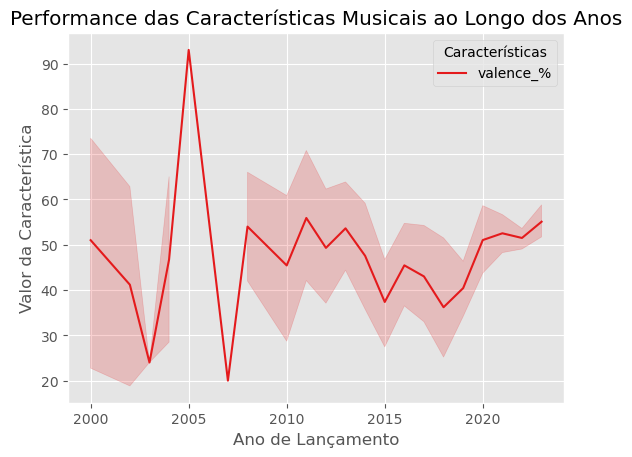

In [122]:
# Selecionando as características que você deseja plotar
characteristics = 'valence_%'  

# Para cada característica, plotamos uma linha representando a variação por ano
sns.lineplot(x='released_year', y=characteristics, data=df_specific_years_range, label=characteristics)

# Ajustando os rótulos e o título
plt.xlabel('Ano de Lançamento')
plt.ylabel('Valor da Característica')
plt.title('Performance das Características Musicais ao Longo dos Anos')

# Exibindo a legenda para identificar cada linha
plt.legend(title='Características')

# Exibindo o gráfico
plt.show()


#### Dançabilidade: se uma música é dançável ou não  
Maior dançabilidade: música perfeita para dançar
Menor dançabilidade: música não apropriada para dançar

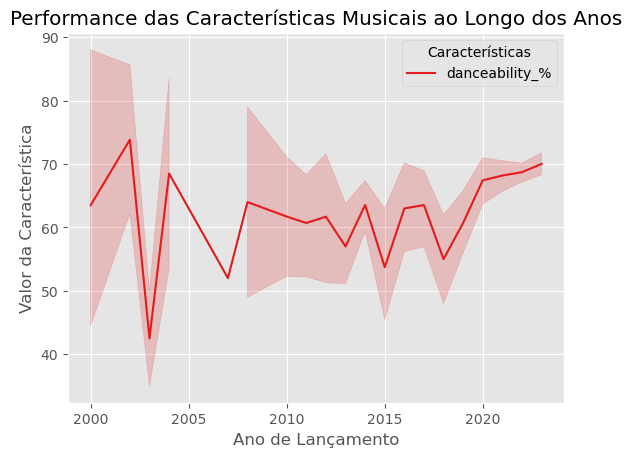

In [124]:
# Selecionando as características que você deseja plotar
characteristics = 'danceability_%'  

# Para cada característica, plotamos uma linha representando a variação por ano
sns.lineplot(x='released_year', y=characteristics, data=df_specific_years_range, label=characteristics)

# Ajustando os rótulos e o título
plt.xlabel('Ano de Lançamento')
plt.ylabel('Valor da Característica')
plt.title('Performance das Características Musicais ao Longo dos Anos')

# Exibindo a legenda para identificar cada linha
plt.legend(title='Características')

# Exibindo o gráfico
plt.show()


#### Energia: o quão frenética é uma música
Maior energia: indica uma música mais rápida e barulhenta  
Menor energia: indica uma música mais suave e tranquila

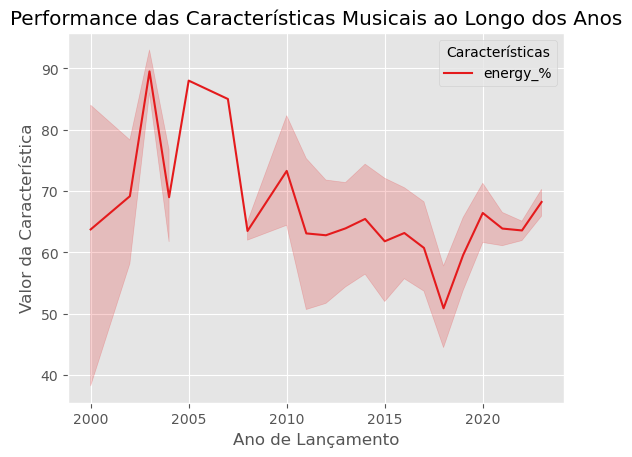

In [127]:
# Selecionando as características que você deseja plotar
characteristics = 'energy_%'  

# Para cada característica, plotamos uma linha representando a variação por ano
sns.lineplot(x='released_year', y=characteristics, data=df_specific_years_range, label=characteristics)

# Ajustando os rótulos e o título
plt.xlabel('Ano de Lançamento')
plt.ylabel('Valor da Característica')
plt.title('Performance das Características Musicais ao Longo dos Anos')

# Exibindo a legenda para identificar cada linha
plt.legend(title='Características')

# Exibindo o gráfico
plt.show()


#### Acousticness: o quão acústica é uma música
Maior acousticness: indica uma música que possui instrumentos não elétricos, como violão, piano acústico, instrumentos de cordas ou percussão.
Menor acousticness: indica uma música que possui instrumentos elétricos, como guitarra elétrica

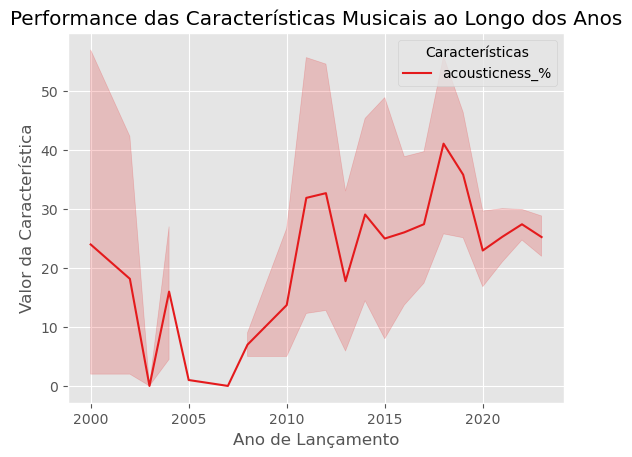

In [128]:
# Selecionando as características que você deseja plotar
characteristics = 'acousticness_%'  

# Para cada característica, plotamos uma linha representando a variação por ano
sns.lineplot(x='released_year', y=characteristics, data=df_specific_years_range, label=characteristics)

# Ajustando os rótulos e o título
plt.xlabel('Ano de Lançamento')
plt.ylabel('Valor da Característica')
plt.title('Performance das Características Musicais ao Longo dos Anos')

# Exibindo a legenda para identificar cada linha
plt.legend(title='Características')

# Exibindo o gráfico
plt.show()


### 4.6) Análises das características musicais

Eu quero plotar um gráfico com as top 10 músicas mais stremadas e tentar entender um pouco quais características musicais (dançabilidade, bpm e etc) teriam relação com o fato das músicas estarem no top 10

Das músicas do top 10, 4 apresentam uma dançabilidade muito alta (80)

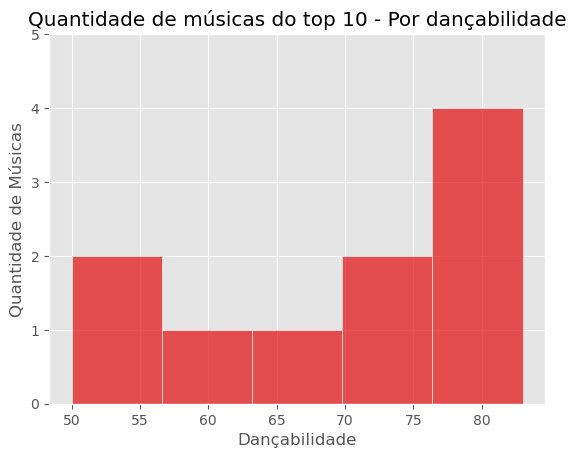

In [25]:
# Quantidade de músicas de acordo com a dançabilidade
sns.histplot(top_10_songs['danceability_%'])
plt.title('Quantidade de músicas do top 10 - Por dançabilidade')
plt.xlabel('Dançabilidade')
plt.ylabel('Quantidade de Músicas')
plt.yticks(range(0, int(top_10_songs['danceability_%'].value_counts().max()) + 4))
plt.show()



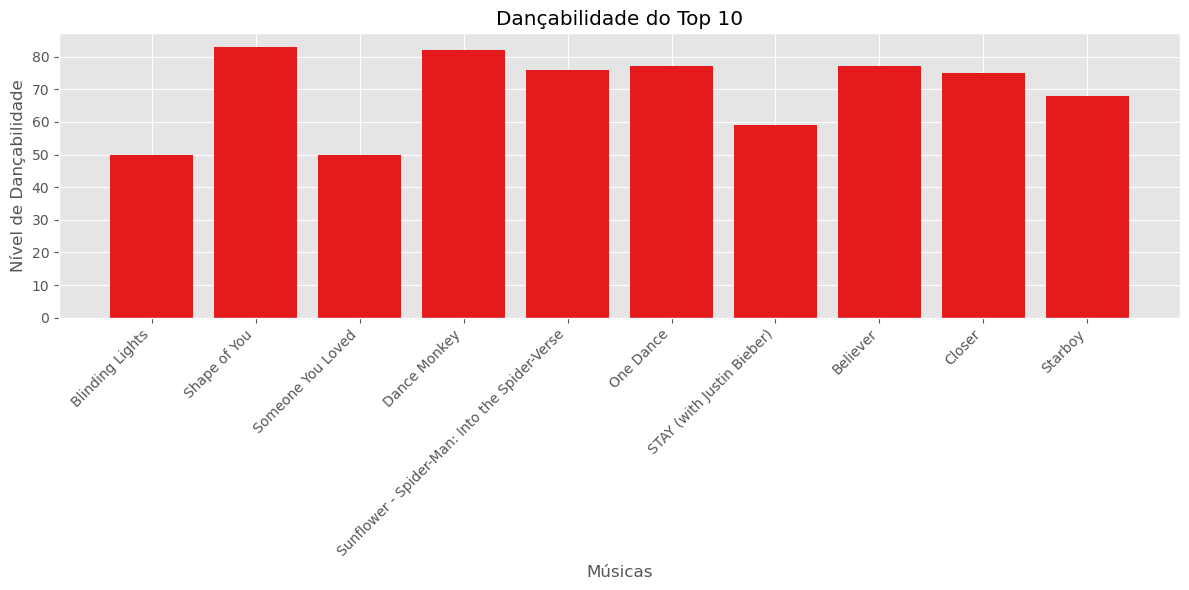

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
55,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3703895074,672,199,0,20,0,171,Major,50,38,80,0,0,9,7
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3562543890,33,0,0,7,0,96,Minor,83,93,65,58,0,9,8
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2887241814,440,125,0,0,0,110,Major,50,45,41,75,0,11,3
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2864791672,533,167,0,6,0,98,Minor,82,54,59,69,0,18,10
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2808096550,372,117,843,4,69,90,Major,76,91,50,54,0,7,5
162,One Dance,"Drake, WizKid, Kyla",3,2016,4,4,43257,24,2713922350,433,107,0,0,26,104,Major,77,36,63,1,0,36,5
84,STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021,7,9,17050,36,2665343922,492,99,798,31,0,170,Major,59,48,76,4,0,10,5
140,Believer,Imagine Dragons,1,2017,1,31,18986,23,2594040133,250,121,0,10,31,125,Minor,77,74,78,4,0,23,11
725,Closer,"The Chainsmokers, Halsey",2,2016,5,31,28032,0,2591224264,315,159,0,0,44,95,Major,75,64,52,41,0,11,3
48,Starboy,"The Weeknd, Daft Punk",2,2016,9,21,29536,79,2565529693,281,137,0,1,140,186,Major,68,49,59,16,0,13,28


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,A,Minor,65,23,80,14,63,11,6


In [26]:
# Analisando a dançabilidade de cada música do top 10
plt.figure(figsize=(12, 6))
plt.bar(top_10_songs['track_name'], top_10_songs['danceability_%'])
plt.xticks(rotation=45, ha='right')
plt.title('Dançabilidade do Top 10')
plt.xlabel('Músicas')
plt.ylabel('Nível de Dançabilidade')
plt.tight_layout()
plt.show()

display(top_10_songs)
display(df_without_null_lines.head(5))

Vou criar uma instância do dataset que contenha apenas as colunas referente as características das músicas e usar o `.corr()` para verificar se tem alguma correlação entre as característica das músicas com a quantidade de streamings  
Sugestões para usar a correlação:
- características musicais x musicas que são add em playlists do spotify e apple music
- características musicais x número de streamings
- características musicais x músicas do spotify charts e apple charts
- características musicais x ano lançado
- características musicais x mês lançado

Vamos ter que tratar a coluna de Mode, onde Minor = 0 e Major = 1  
São variáveis descritivas, senão me engano

In [27]:
display(df_without_key_column.head(5))

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,bpm,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826,125,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382,92,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949,138,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548,170,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425,144,Minor,65,23,80,14,63,11,6


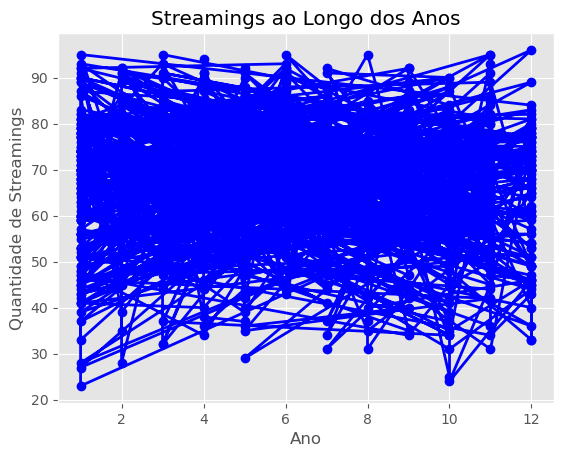

In [28]:
plt.plot(df_without_key_column['released_month'], df_without_key_column['danceability_%'], marker='o', color='blue', linestyle='-', linewidth=2)
plt.title('Streamings ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Streamings')
plt.show()

## 6) Correlação: Características Musicais x Outras variáveis

#### 1 - Streams x Caracteristicas Musicais: corr negativa em todos  

In [29]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['streams', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['streams']]
display(correlacao)

,streams
streams,1.000000
bpm,-0.002011
danceability_%,-0.104451
valence_%,-0.041749
energy_%,-0.026311
acousticness_%,-0.003746
instrumentalness_%,-0.044703
liveness_%,-0.048232
speechiness_%,-0.111568


bpm: -0.002011
Esse valor é praticamente zero, indicando que não há uma relação significativa entre o bpm (batidas por minuto) e o número de streams. Se o bpm aumenta ou diminui, o número de streams não muda de forma previsível.

danceability_%: -0.104451
Esse valor indica uma correlação negativa fraca. Isso sugere que músicas mais dançantes tendem a ter um número um pouco menor de streams, mas a relação é muito fraca.

valence_%: -0.041749
Esse valor também indica uma correlação negativa muito fraca. Valence_% mede o quão positiva é a música. Uma ligeira tendência negativa sugere que músicas mais "felizes" podem ter um número ligeiramente menor de streams, mas a relação é insignificante.

energy_%: -0.026311
Novamente, temos uma correlação negativa muito fraca. Isso significa que a energia da música tem pouco ou nenhum efeito sobre o número de streams.

acousticness_%: -0.003746
Esse valor é quase zero, o que indica que a quantidade de elementos acústicos na música não está relacionada de forma significativa ao número de streams.

instrumentalness_%: -0.044703
Outra correlação negativa fraca, sugerindo que músicas mais instrumentais tendem a ter um número ligeiramente menor de streams, mas a relação é muito fraca.

liveness_%: -0.048232
Liveness_% também tem uma correlação negativa fraca, o que indica que músicas que parecem mais "ao vivo" têm uma pequena tendência a ter menos streams.

speechiness_%: -0.111568
Essa é a correlação negativa mais forte, mas ainda é fraca. Sugere que músicas com mais elementos falados (como rap) tendem a ter menos streams, mas novamente, a relação não é forte.

As correlações negativas são todas bastante fracas, sugerindo que as características musicais analisadas têm pouca influência direta sobre o número de streams. Isso indica que outros fatores podem ser mais importantes para determinar a popularidade de uma música (número de streams), como marketing, contexto cultural, ou playlists em plataformas de streaming.

#### 2 - Ano de Lançamento x Caracteristicas Musicais: corr negativa na maioria

In [30]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['released_year', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['released_year']]
display(correlacao)

,released_year
released_year,1.000000
bpm,-0.005334
danceability_%,0.187333
valence_%,-0.059355
energy_%,0.095226
acousticness_%,-0.124156
instrumentalness_%,-0.014562
liveness_%,-0.005819
speechiness_%,0.133819


Caracteristicas que apresentaram uma correlação relevante a se analisar:  
- Dançabilidade
- Acousticness
- Speechiness

released_year: 1.000000
Isso é esperado, pois estamos correlacionando a coluna released_year com ela mesma, o que sempre resulta em uma correlação perfeita de 1.
Correlações com o released_year
bpm: -0.005334
A correlação entre bpm e released_year é praticamente zero, sugerindo que o tempo da música (batidas por minuto) não mudou significativamente com o passar dos anos. Ou seja, o ano de lançamento não parece influenciar o bpm das músicas.

danceability_%: 0.187333
Essa é uma correlação positiva, embora fraca. Isso sugere que músicas mais recentes tendem a ser ligeiramente mais dançantes. Embora não seja uma relação forte, há uma leve tendência de que as músicas lançadas em anos mais recentes sejam um pouco mais propensas a serem dançantes.

valence_%: -0.059355
A correlação é negativa e muito fraca, indicando que não há uma relação clara entre o ano de lançamento e o quanto a música é "feliz" ou positiva.

energy_%: 0.095226
Há uma correlação positiva fraca, sugerindo que músicas lançadas em anos mais recentes podem ter uma leve tendência a serem mais enérgicas, mas novamente, a relação não é forte.

acousticness_%: -0.124156
Essa correlação negativa indica que, ao longo dos anos, as músicas podem estar se tornando ligeiramente menos acústicas. Isso faz algum sentido, dado o aumento na produção de música eletrônica e o uso de tecnologias digitais.

instrumentalness_%: -0.014562
A correlação é praticamente inexistente, sugerindo que o grau de instrumentalidade das músicas não mudou significativamente ao longo dos anos.

liveness_%: -0.005819
Quase zero, indicando que o "ao vivo" das músicas não tem sido afetado pelo ano de lançamento.

speechiness_%: 0.133819
Uma correlação positiva, embora fraca, sugere que músicas lançadas em anos mais recentes podem ter uma ligeira tendência a incluir mais elementos falados, como rap ou discurso.

Análise Geral  
As correlações encontradas são em sua maioria fracas, sugerindo que o ano de lançamento das músicas tem pouca influência direta sobre essas características musicais. Entretanto, algumas tendências sutis podem ser observadas:

Músicas mais recentes tendem a ser um pouco mais dançantes e enérgicas.
Pode haver uma leve tendência de diminuição na "acousticness" ao longo do tempo, refletindo mudanças nas preferências de produção musical.
Essas observações podem ser úteis para entender como a música evoluiu ao longo do tempo, mas as correlações fracas indicam que muitos outros fatores provavelmente estão em jogo.


Mesmo que a correlação seja negativa, isso pode nos dar informações importantes para a análise.  
Isso significa que a NÃO RELAÇÃO entre as variáveis seja relevante.

#### 3 - Anos de 2018-2023 x Características Musicais: corr negativa na maioria  

In [31]:
# instância do df que contém dados apenas dos anos de 2018 até 2023
df_years = df_without_key_column.loc[(df_without_key_column['released_year'] >= 2018) & (df_without_key_column['released_year'] <= 2023)]



In [32]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_years, columns = ['released_year', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['released_year']]
display(correlacao)

,released_year
released_year,1.000000
bpm,0.041217
danceability_%,0.148476
valence_%,0.123306
energy_%,0.122444
acousticness_%,-0.063679
instrumentalness_%,-0.037809
liveness_%,0.051566
speechiness_%,0.031871


Correlações positivas, embora fracas:  
- danceability_%	0.148476
- valence_%	0.123306
- energy_%	0.122444

bpm: 0.041217
Essa correlação é positiva, mas extremamente fraca. Isso sugere que, ao longo dos anos, o bpm das músicas pode ter aumentado ligeiramente, mas a relação é quase insignificante.

danceability_%: 0.148476
Aqui, temos uma correlação positiva um pouco mais forte, mas ainda considerada fraca. Isso indica uma leve tendência de que músicas mais recentes são um pouco mais dançantes, o que pode refletir uma mudança nas preferências musicais ao longo do tempo.

valence_%: 0.123306
Essa correlação positiva fraca sugere que músicas lançadas em anos mais recentes tendem a ser um pouco mais "felizes" ou positivas. Embora a correlação não seja forte, há uma pequena tendência nesse sentido.

energy_%: 0.122444
Uma correlação positiva fraca, indicando que músicas mais recentes podem ser ligeiramente mais energéticas, mas, novamente, a relação é sutil.

acousticness_%: -0.063679
A correlação negativa, embora fraca, sugere que músicas mais recentes tendem a ser um pouco menos acústicas. Isso pode refletir o aumento do uso de produção digital e elementos eletrônicos na música moderna.

instrumentalness_%: -0.037809
Uma correlação negativa muito fraca, sugerindo que a quantidade de músicas instrumentais não mudou significativamente ao longo dos anos.

liveness_%: 0.051566
Essa correlação positiva fraca indica que músicas mais recentes têm uma leve tendência a parecer mais "ao vivo", mas a relação é muito fraca.

speechiness_%: 0.031871
Uma correlação positiva muito fraca, sugerindo que a quantidade de elementos falados (como rap) nas músicas não mudou muito ao longo dos anos.

Análise Geral  
As correlações obtidas são todas muito fracas, indicando que o ano de lançamento não tem uma influência significativa sobre essas características musicais. Algumas observações sutis podem ser feitas, como:

Uma leve tendência de aumento na dançabilidade, positividade (valence_%), e energia das músicas ao longo dos anos.
Uma pequena tendência de diminuição na acústica das músicas, o que pode ser consistente com o aumento da produção digital na música moderna.
Essas correlações fracas sugerem que, embora possa haver algumas tendências gerais, muitos outros fatores estão influenciando as características das músicas além do ano de lançamento.

Você pode plotar gráficos usando essa instância do data frame para analisar melhor as características musicais

#### 4 - Qtdade em Playlists x Características Musicais: corr negativa na maioria, tanto spotify quanto apple

In [33]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['in_spotify_playlists', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['in_spotify_playlists']]
display(correlacao)

,in_spotify_playlists
in_spotify_playlists,1.000000
bpm,-0.019598
danceability_%,-0.106534
valence_%,-0.021883
energy_%,0.033808
acousticness_%,-0.064421
instrumentalness_%,-0.028134
liveness_%,-0.046695
speechiness_%,-0.089722


In [34]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['in_apple_playlists', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['in_apple_playlists']]
display(correlacao)


,in_apple_playlists
in_apple_playlists,1.000000
bpm,0.023725
danceability_%,-0.025326
valence_%,0.057075
energy_%,0.052615
acousticness_%,-0.061781
instrumentalness_%,-0.057219
liveness_%,-0.049596
speechiness_%,-0.108011


#### 5 - Qtdade em Charts x Características Musicais: corr negativa na maioria, tanto spotify, apple, deezer e shazam

In [35]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['in_spotify_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['in_spotify_charts']]
display(correlacao)

,in_spotify_charts
in_spotify_charts,1.000000
bpm,0.034713
danceability_%,0.030071
valence_%,0.035531
energy_%,0.081920
acousticness_%,-0.054987
instrumentalness_%,-0.010146
liveness_%,-0.047552
speechiness_%,-0.081765


In [36]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['in_apple_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['in_apple_charts']]
display(correlacao)

,in_apple_charts
in_apple_charts,1.000000
bpm,0.030962
danceability_%,-0.025204
valence_%,0.047733
energy_%,0.104828
acousticness_%,-0.076793
instrumentalness_%,-0.013145
liveness_%,-0.018733
speechiness_%,-0.151539


In [37]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['in_deezer_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['in_deezer_charts']]
display(correlacao)

,in_deezer_charts
in_deezer_charts,1.000000
bpm,0.028036
danceability_%,0.070913
valence_%,0.076196
energy_%,0.094627
acousticness_%,-0.029361
instrumentalness_%,0.005398
liveness_%,-0.007568
speechiness_%,-0.080555


In [38]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['in_shazam_charts', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['in_shazam_charts']]
display(correlacao)

,in_shazam_charts
in_shazam_charts,1.000000
bpm,0.072700
danceability_%,-0.004036
valence_%,-0.018159
energy_%,0.099393
acousticness_%,-0.079414
instrumentalness_%,-0.016930
liveness_%,-0.058463
speechiness_%,-0.061766


#### 6 - Mês x Características Musicais: corr negativa na maioria

In [39]:
# criar instancia do df com apenas colunas das caracteristicas musicais e a coluna modelo que queremos correlacionar
df_musical_charac = pd.DataFrame(df_without_key_column, columns = ['released_month', 'bpm', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'])

correlacao = df_musical_charac.corr()[['released_month']]
display(correlacao)

,released_month
released_month,1.000000
bpm,-0.039252
danceability_%,-0.046403
valence_%,-0.118571
energy_%,-0.083710
acousticness_%,0.054430
instrumentalness_%,0.033985
liveness_%,-0.012348
speechiness_%,0.039838
